# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import importlib
from datetime import timedelta
import pandas as pd

import matplotlib.dates as mdates
import numpy as np
from matplotlib import pyplot as plt

import util
import main

importlib.reload(util)
importlib.reload(main)

<module 'main' from 'C:\\dev\\git_home\\sandbox\\service-instance-estimation\\main.py'>

In [18]:
# Example format of the TSV file:
# "StartTime","EndTime"
# "2025-05-16 19:50:03.2040000","2025-05-16 21:02:22.8440000"
# "2025-05-16 19:52:30.7260000","2025-05-16 21:00:30.1480000"
# "2025-05-16 19:53:15.0750000","2025-05-16 21:13:08.4190000"
# ...

df = pd.read_csv(r'c:\Users\sergeiiaskov\OneDrive - Microsoft\dev\tasks\4163956\ring0__ring0_s__ring1.csv', sep='\t')
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])

sessions = list(zip(df['StartTime'], df['EndTime']))

Locator attempting to generate 1054 ticks ([20248.69722222222, ..., 20249.428472222222]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1054 ticks ([20248.69722222222, ..., 20249.428472222222]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1054 ticks ([20248.69722222222, ..., 20249.428472222222]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1054 ticks ([20248.69722222222, ..., 20249.428472222222]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1054 ticks ([20248.69722222222, ..., 20249.428472222222]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1054 ticks ([20248.69722222222, ..., 20249.428472222222]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1054 ticks ([20248.69722222222, ..., 20249.428472222222]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1054 ticks ([20248.69722222222, ..., 20249.428472222222]), which e

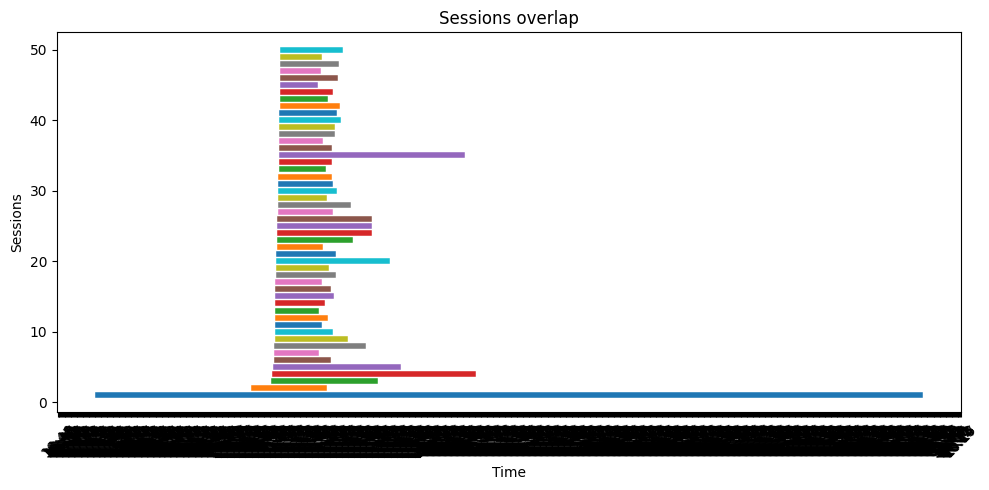

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, (start, end) in enumerate(sorted(sessions[:50], key=lambda x: x[0])):
    ax.plot([start, end], [i + 1, i + 1], label=f"Session {i + 1}", linewidth=4)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.xticks(rotation=45)

ax.set_xlabel("Time")
ax.set_ylabel("Sessions")
ax.set_title("Sessions overlap")

plt.tight_layout()
plt.show()

In [20]:
def format_time(seconds):
    if seconds < 60:
        return f"{seconds:.1f} s"

    minutes, seconds = divmod(seconds, 60)
    if minutes < 60:
        return f"{int(minutes)}m {seconds:.1f}s"

    hours, minutes = divmod(minutes, 60)
    return f"{int(hours)}h {int(minutes)}m {seconds:.1f}s"

In [29]:
total_composers = 900
composition_speed = 1
delay_threshold_s = timedelta(minutes=10).total_seconds()
delays_s = main.calculate_delays_s(sessions, total_composers, composition_speed)

delays_s_np = np.array(delays_s)

In [30]:
statistics = {
    "max_delay": delays_s_np.max(),
    "avg_delay": delays_s_np.mean(),
    "95th_percentile": np.percentile(delays_s_np, 95),
    "99th_percentile": np.percentile(delays_s_np, 99),
    "percent_under_threshold": (delays_s_np <= delay_threshold_s).mean() * 100,
    "delays": delays_s,
}

n_delays = 10
print(f"Top {n_delays} delays in s: {sorted(delays_s, reverse=True)[:n_delays]}")

meets_sla = statistics['95th_percentile'] <= delay_threshold_s
status = "✅ OK" if meets_sla else "❌ FAIL"

print(f"{total_composers} instances: "
      f"Max delay = {format_time(statistics['max_delay'])}, "
      f"Avg delay = {format_time(statistics['avg_delay'])}, "
      f"95th = {format_time(statistics['95th_percentile'])}, "
      f"99th = {format_time(statistics['99th_percentile'])}, "
      f"% under threshold = {statistics['percent_under_threshold']}, "
      f"→ {status}")

Top 10 delays in s: [4993.444, 4993.339, 4993.085, 4993.024, 4992.927, 4992.472, 4991.881, 4991.692, 4991.324, 4990.504]
900 instances: Max delay = 1h 23m 13.4s, Avg delay = 1m 4.7s, 95th = 0.0 s, 99th = 37m 40.6s, % under threshold = 97.10166850235015, → ✅ OK
